# 1. Description
**L1 regularization,** also known as **L1 norm or Lasso** (in regression problems), combats overfitting by shrinking the parameters towards **0.** This makes some features obsolete.

It’s a form of feature selection, because when we assign a feature with a **0 weight,** we’re *multiplying the feature values by **0 which returns 0,** eradicating the significance of that feature.*

If the input features of our model have weights closer to **0,** our **L1** norm would be sparse. A selection of the input features would have weights equal to zero, and the rest would be non-zero.

**Thanks To:**
1. [Fighting Overfitting With L1 or L2 Regularization](https://neptune.ai/blog/fighting-overfitting-with-l1-or-l2-regularization)

# 2. Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# 3. Load dataset

In [2]:
# load the dataset
url = "https://raw.githubusercontent.com/akdubey2k/ML/main/ML_17_2_Linear_Regression_without_Regularization/ML_17_2_housing.csv"

# reading data into pandas dataframe
df = pd.read_csv(url, header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# 3. Dataset EDA (exploratory data analysis)
## 3.1 Summarize the Dataset
* Dimensions of the dataset.
* Peek at the data itself.(Throw a glance at; take a brief look at)
* Statistical summary of all attributes.
* Breakdown of the data by the class variable.

In [3]:
# dimension of dataset (rows & columns)
print("\nShape matirx (rows & columns) ".ljust(50, '.'), ": ", df.shape)


Shape matirx (rows & columns) ................... :  (506, 14)


In [4]:
# statistical summary of all attributes.
print("\nstatistical summary of all attributes =>\n", df.describe())


statistical summary of all attributes =>
                0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

               6           7           8           9           10          11  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534

# 4. Data distribution into **independent and dependent** variable

In [5]:
# selecting a single feature
# only using 100 instances for simplicity
X = df.loc[:100, 5].values # independent variable, Extract values as NumPy array
y = df.loc[:100, 13].values # dependent variable, target label

## 4.1 reshaping the data into 2-D array

In [6]:
# reshape the data
X_reshaped = X[:, np.newaxis]
y_reshaped = y[:, np.newaxis]

print("\nShape of independent variable ".ljust(50, '.'), ": ", X.shape)
print("\nShape of dependent variable ".ljust(50, '.'), ": ", y.shape)

print("\nReshape of independent variable into 2-D matrix ".ljust(50, '.'), ": ", X_reshaped.shape)
print("\nReshape of dependent variable into 2-D matrix ".ljust(50, '.'), ": ", y_reshaped.shape)


Shape of independent variable ................... :  (101,)

Shape of dependent variable ..................... :  (101,)

Reshape of independent variable into 2-D matrix . :  (101, 1)

Reshape of dependent variable into 2-D matrix ... :  (101, 1)


# 5. Build and train model

In [7]:
# instantiating the lasso regression model
lasso = Lasso(alpha=10)

# training the model
lasso.fit(X_reshaped, y_reshaped)

Lasso(alpha=10)

# 6. Predict the target

In [8]:
# making predictions on the training data
y_pred = lasso.predict(X_reshaped)

print("\nPredicted values =>\n", y_pred)


Predicted values =>
 [22.36039604 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604
 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604
 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604
 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604
 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604
 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604
 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604
 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604
 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604
 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604
 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604
 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604
 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604 22.36039604
 22.36039604 22.36039604 22.3

# 7. Evaluate the model

In [9]:
#  mean_squared_erro(actual, predicted)
mse = mean_squared_error(y_reshaped, y_pred)
print("\nMean Squared Error =>\n", mse)
print("\nModel Coefficients =>\n", lasso.coef_)
print("\nModel Intercept =>\n", lasso.intercept_)


Mean Squared Error =>
 34.709124595627884

Model Coefficients =>
 [0.]

Model Intercept =>
 [22.36039604]


# 8. Compare true vs predicted values

In [11]:
if len(y_reshaped) != len(y_pred):
  print("\nThe lists 'y_true' and 'y_pred' must have the same length.\n")
else:
  # threshold = 2  # Define a threshold for the difference
  red_color = "\033[91m"
  reset_color = "\033[0m"

print(f"{'y_reshaped':>15} {'y_pred':>15}")
print("="*31)

for true, pred in zip(y_reshaped, y_pred):
  diff = abs(true - pred)
  threshold = 0.1 * abs(true)  # Define a threshold 10% of the true value for the difference

  if diff > threshold:
    # Extract the numeric values from the arrays for formatting if they are arrays, otherwise just use the value
    true_value = true[0] if isinstance(true, (list, np.ndarray)) else true
    pred_value = pred[0] if isinstance(pred, (list, np.ndarray)) else pred
    print(f"{red_color}{true_value:>15.5f} {pred_value:>15.5f}{reset_color}")
  else:
    # Extract the numeric values from the arrays for formatting if they are arrays, otherwise just use the value
    true_value = true[0] if isinstance(true, (list, np.ndarray)) else true
    pred_value = pred[0] if isinstance(pred, (list, np.ndarray)) else pred
    print(f"{true_value:>15.5f} {pred_value:>15.5f}")

     y_reshaped          y_pred
       24.00000        22.36040
       21.60000        22.36040
       34.70000        22.36040
       33.40000        22.36040
       36.20000        22.36040
       28.70000        22.36040
       22.90000        22.36040
       27.10000        22.36040
       16.50000        22.36040
       18.90000        22.36040
       15.00000        22.36040
       18.90000        22.36040
       21.70000        22.36040
       20.40000        22.36040
       18.20000        22.36040
       19.90000        22.36040
       23.10000        22.36040
       17.50000        22.36040
       20.20000        22.36040
       18.20000        22.36040
       13.60000        22.36040
       19.60000        22.36040
       15.20000        22.36040
       14.50000        22.36040
       15.60000        22.36040
       13.90000        22.36040
       16.60000        22.36040
       14.80000        22.36040
       18.40000        22.36040
       21.00000        22.36040
       1

# 9. Data Visualization

## 9.1 Scatterplot without best fit line

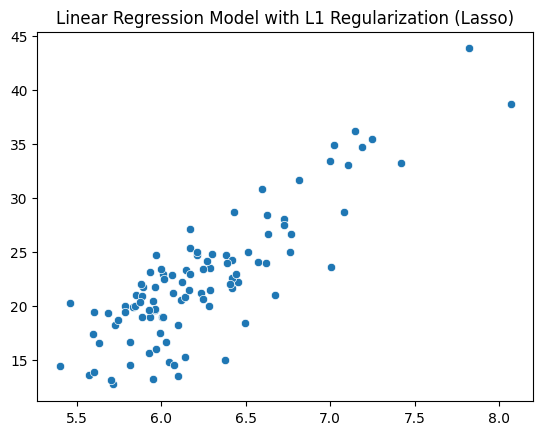

In [13]:
# scatterplot for L1 Regularization (Lasso)
sns.scatterplot(x=X,y=y)
# plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model with L1 Regularization (Lasso)")
plt.show()